# Predicción de Series Temporales con Redes Neuronales

El artículo completo con la explicación detallada en el blog: http://www.aprendemachinelearning.com/

## Usaremos Keras y Tensorflow

Importamos las Librerías que vamos a utilizar

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fast')

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

### Cargamos nuestro Dataset

In [65]:
df = pd.read_csv('LT_OUT.csv', index_col=0, header=None,parse_dates=[0],squeeze=True,names=['fecha','OPC1','OPC2','OPC3','OPC4','OPC5','OPC6']) ##,parse_dates=[0]index_col=0, squeeze=True)
#,names=['fecha','unidades'])
df.head()
#df = df1.loc [:,'OPC3']
#df.head().T

,OPC1,OPC2,OPC3,OPC4,OPC5,OPC6
fecha,,,,,,
2019-12-18,0,0,2,0,0,0
2019-12-19,23,172,20,83,49,146
2019-12-20,52,186,26,54,59,173
2020-01-02,1,0,0,0,0,0
2020-01-03,0,6,0,0,0,0


In [66]:
df.describe()

,OPC1,OPC2,OPC3,OPC4,OPC5,OPC6
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,58.702194,244.557994,30.100313,63.137931,74.347962,197.454545
std,42.605795,201.637531,21.872328,43.989204,61.743341,158.332179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,137.000000,16.000000,37.000000,39.000000,108.000000
50%,52.000000,205.000000,26.000000,54.000000,58.000000,172.000000
75%,79.000000,312.000000,38.000000,81.000000,98.000000,259.500000
max,412.000000,2473.000000,188.000000,423.000000,729.000000,1830.000000


In [67]:
print(df.index.min())
print(df.index.max())

2019-12-18 00:00:00
2021-04-23 00:00:00


In [68]:
print(len(df['2019']))
print(len(df['2020']))
print(len(df['2021']))

3
240
76


In [69]:
meses =df.resample('M').mean()
meses

,OPC1,OPC2,OPC3,OPC4,OPC5,OPC6
fecha,,,,,,
2019-12-31,25.000000,119.333333,16.000000,45.666667,36.000000,106.333333
2020-01-31,99.590909,354.045455,38.590909,98.772727,102.545455,255.681818
2020-02-29,89.700000,375.650000,41.400000,90.950000,118.650000,283.250000
2020-03-31,62.545455,279.136364,24.590909,66.909091,83.363636,218.272727
2020-04-30,52.066667,290.933333,26.666667,69.866667,75.066667,300.533333
2020-05-31,54.350000,194.600000,28.750000,65.100000,73.400000,208.200000
2020-06-30,27.681818,85.545455,15.500000,29.590909,35.181818,89.409091
2020-07-31,21.090909,67.681818,11.318182,53.818182,24.818182,59.272727
2020-08-31,25.200000,112.450000,15.650000,38.100000,35.850000,70.050000


## Visualizaciones

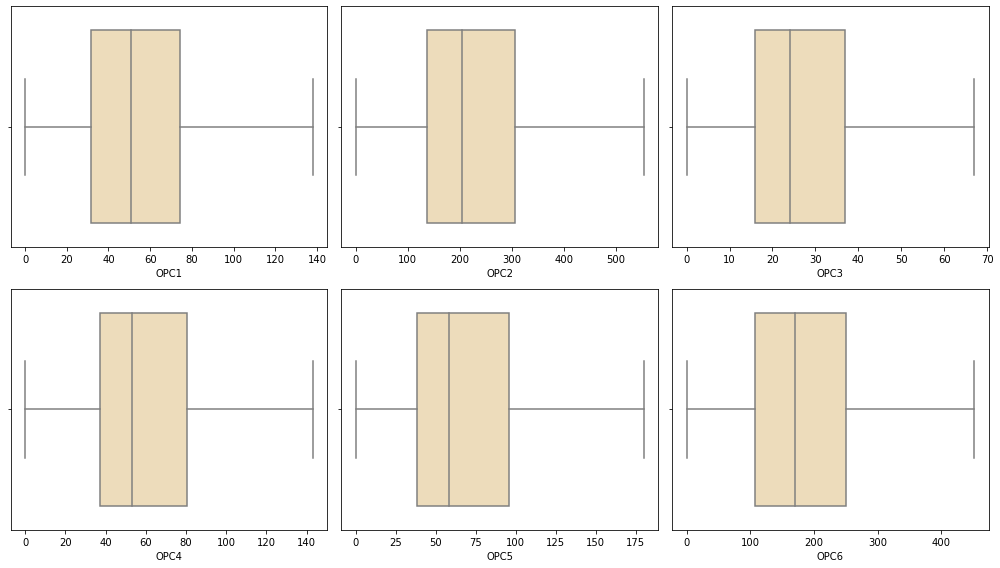

In [77]:
# Box plot for each attribute
fig, ax = plt.subplots(2,3, figsize=(14,8))
axes_ = [axes_row for axes in ax for axes_row in axes]
for i,c in enumerate(df.columns):
    sns.boxplot(x=df1[c], ax = axes_[i], color = 'wheat', orient='h')
    plt.tight_layout()

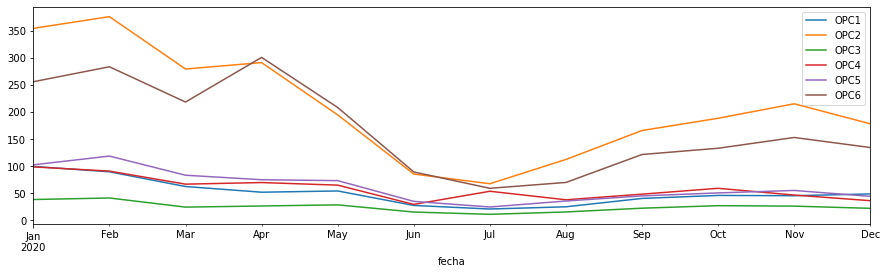

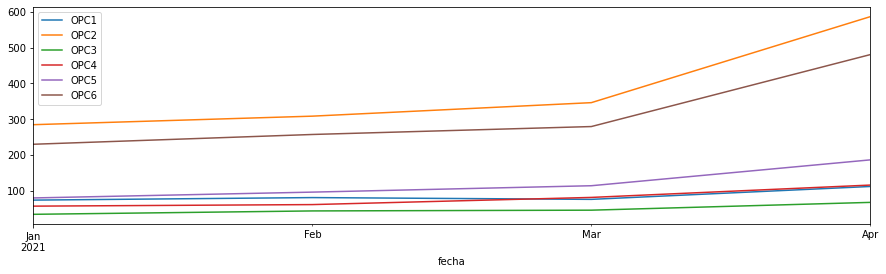

In [82]:
#plt.plot(meses['2020'].values)
plot = meses['2020'].plot(figsize=(15, 4))
#plt.plot(meses['2021'].values)
plot = meses['2021'].plot(figsize=(15, 4))

In [72]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
    return outliers
 
# input data
#print(df)
df1 = df
detect_outlier((df1['OPC1']))
detect_outhttp://localhost:8888/notebooks/Desktop/Maestria/LT_con_RRNN.ipynb#Ajustamos-valores-anomaloslier((df1['OPC2']))
detect_outlier((df1['OPC3']))
detect_outlier((df1['OPC4']))
detect_outlier((df1['OPC5']))
detect_outlier((df1['OPC6']))

[888, 565, 1190, 925, 523, 1830]

### Ajustamos valores anomalos

In [73]:
df1 = df

In [76]:
#missing value treatment
cols = df1.columns

for j in cols:    
    outliers = detect_outlier(df1[j])
    #print(outliers)
    for i in range(0,len(df1)):
       if df1[j][i] in outliers: ##== -200:
           print(df1[j][i])
           df1[j][i] = df1[j][i-1]

## Analizando las series

In [32]:
# calculando el porcentaje de variación del día.
variacion_diaria1 = df1['OPC1'] / df1['OPC1'].shift(1) - 1
variacion_diaria2 = df1['OPC2'] / df1['OPC2'].shift(1) - 1
variacion_diaria3 = df1['OPC3'] / df1['OPC3'].shift(1) - 1
variacion_diaria4 = df1['OPC4'] / df1['OPC4'].shift(1) - 1
variacion_diaria5 = df1['OPC5'] / df1['OPC5'].shift(1) - 1
variacion_diaria6 = df1['OPC6'] / df1['OPC6'].shift(1) - 1
# mismo resultado utilizando pct_change()
#df['OPC1'].pct_change()[:5]

df1['var_diaria1'] = variacion_diaria1
df1['var_diaria2'] = variacion_diaria2
df1['var_diaria3'] = variacion_diaria3
df1['var_diaria4'] = variacion_diaria4
df1['var_diaria5'] = variacion_diaria5
df1['var_diaria6'] = variacion_diaria6
df1['var_diaria1'][:5]

fecha
2019-12-18         NaN
2019-12-19         inf
2019-12-20    0.130841
2020-01-02   -1.000000
2020-01-03         inf
Name: var_diaria1, dtype: float64

In [33]:
# calculando rendimiento acumulado diario
rendimiento_diario1 = (1 + df1['OPC1'].pct_change()).cumprod()
rendimiento_diario2 = (1 + df1['OPC2'].pct_change()).cumprod()
rendimiento_diario3 = (1 + df1['OPC3'].pct_change()).cumprod()
rendimiento_diario4 = (1 + df1['OPC4'].pct_change()).cumprod()
rendimiento_diario5 = (1 + df1['OPC5'].pct_change()).cumprod()
rendimiento_diario6 = (1 + df1['OPC6'].pct_change()).cumprod()
df1['rend_diario1'] = rendimiento_diario1
df1['rend_diario2'] = rendimiento_diario2
df1['rend_diario3'] = rendimiento_diario3
df1['rend_diario4'] = rendimiento_diario4
df1['rend_diario5'] = rendimiento_diario5
df1['rend_diario6'] = rendimiento_diario6
df1['rend_diario1'][:5]

fecha
2019-12-18    NaN
2019-12-19    inf
2019-12-20    inf
2020-01-02    NaN
2020-01-03    NaN
Name: rend_diario1, dtype: float64

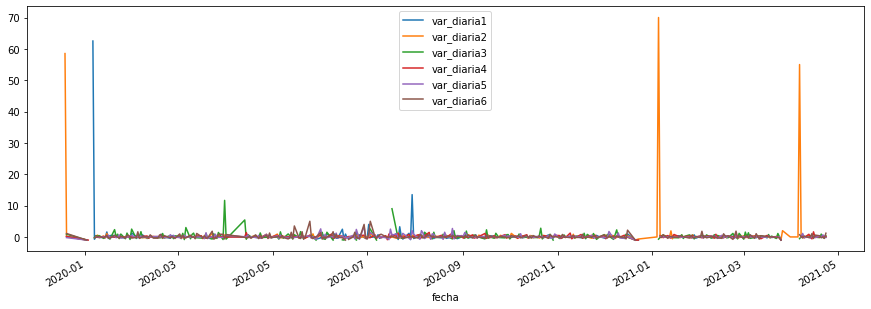

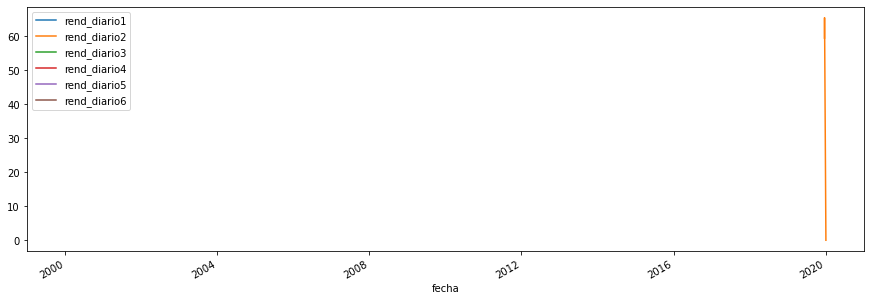

In [34]:
# graficando
#fig, ax = plt.subplots(2,3, figsize=(14,8))
#axes_ = [axes_row for axes in ax for axes_row in axes]
#for i,c in enumerate(df.columns):
#    sns.boxplot(x=df[c], ax = axes_[i], color = 'wheat', orient='h')
#    plt.tight_layout()

plot = df1[['var_diaria1','var_diaria2','var_diaria3','var_diaria4','var_diaria5','var_diaria6']].plot(figsize=(15, 5))
plot = df1[['rend_diario1','rend_diario2','rend_diario3','rend_diario4','rend_diario5','rend_diario6']].plot(figsize=(15, 5))
#df.head()

# Preprocesado de los datos

In [78]:
#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
johan_test_temp = df1 #data.drop([ 'CO(GT)'], axis=1)
coint_johansen(johan_test_temp,-1,1).eig

array([0.3826962 , 0.25536702, 0.21940889, 0.18459121, 0.11406921,
       0.00319696])

In [79]:
#creating the train and validation set
train = df1[:int(0.8*(len(df1)))]
valid = df1[int(0.8*(len(df1))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

D:\Personal\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Personal\Anaconda\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [80]:
import math as mt
from sklearn.metrics import mean_squared_error
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,6):  # Eran 13 ahora son 6
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#print(pred)
#print(valid)
#print(mt.sqrt(mean_squared_error(pred[['CO(GT)']], valid[['CO(GT)']])))
#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', mt.sqrt(mean_squared_error(pred[[i]], valid[[i]])))

rmse value for OPC1 is :  39.55104445663379
rmse value for OPC2 is :  186.12239008130078
rmse value for OPC3 is :  24.56688049140355
rmse value for OPC4 is :  36.04251728376122
rmse value for OPC5 is :  62.23000374269686
rmse value for OPC6 is :  153.51612898797003


In [93]:
#make final predictions
model = VAR(endog=df1)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=5) # steps días a proyectar
print(yhat.astype('int64'))

[[106 497  50  98 148 408]
 [103 464  49  97 140 379]
 [ 98 436  47  94 132 355]
 [ 93 411  45  90 125 334]
 [ 89 390  43  87 119 316]]


D:\Personal\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Personal\Anaconda\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


### Si uso Vector Autoregression Moving-Average (VARMA)

In [94]:
###### fit model
from statsmodels.tsa.statespace.varmax import VARMAX
model = VARMAX(endog=df1.astype('float64'), order=(1, 1)) #
model_fit = model.fit(disp=False) # 
# make prediction
yhat = model_fit.forecast(steps=5)
print(yhat.astype('int64'))

D:\Personal\Anaconda\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\Personal\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Personal\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


     OPC1  OPC2  OPC3  OPC4  OPC5  OPC6
319   107   500    52   104   144   394
320   107   470    51    99   154   395
321   104   457    49   101   140   371
322   100   437    47    96   137   359
323    97   421    45    93   131   345


D:\Personal\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [ ]:
### Finalizazo el modelo 1 para todas las variables.

In [39]:
PASOS=5  # Dias

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = df.values
#values

In [40]:
# ensure all data is float
values = values.astype('int64') #('float32')
#values

In [41]:
# normalize features
#scaler = MinMaxScaler(feature_range=(-1, 1))
#scaler

In [42]:
#values=values.reshape(-1, 6) # esto lo hacemos porque tenemos  sola dimension
print(len(values))

319


In [43]:
#scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 6)
reframed.head()
#print(len(reframed))

,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var7(t-5),var8(t-5),var9(t-5),var10(t-5),...,var57(t+5),var58(t+5),var59(t+5),var60(t+5),var61(t+5),var62(t+5),var63(t+5),var64(t+5),var65(t+5),var66(t+5)
5,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
8,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
9,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0


## Dividimos en set de Entrenamiento y Validación

In [23]:
# split into train and test sets
values = reframed.values
print(len(values))

309


In [24]:
n_train_days = 240+76 - (30+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
#print(len(train))
#print("test")
#print(len(test))

In [25]:
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
#print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

# Creamos el Modelo de Red Neuronal

## Utilizaremos una Red "normal" Feedforward

In [26]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model


## Entrenamos nuestra máquina

In [27]:
EPOCHS=40

model = crear_modeloFF()

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 5)              30        
_________________________________________________________________
flatten (Flatten)            (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40


ValueError: in user code:

    D:\Personal\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    D:\Personal\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\Personal\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\Personal\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\Personal\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\Personal\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    D:\Personal\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    D:\Personal\Anaconda\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    D:\Personal\Anaconda\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 5 but received input with shape (None, 1, 65)


## Visualizamos Resultados

33


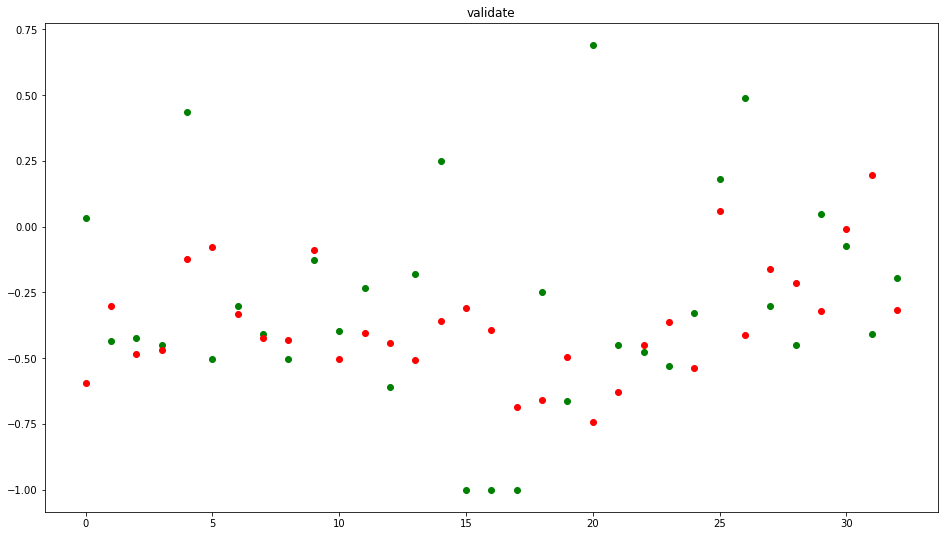

In [309]:
results=model.predict(x_val)
print( len(results) )
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()


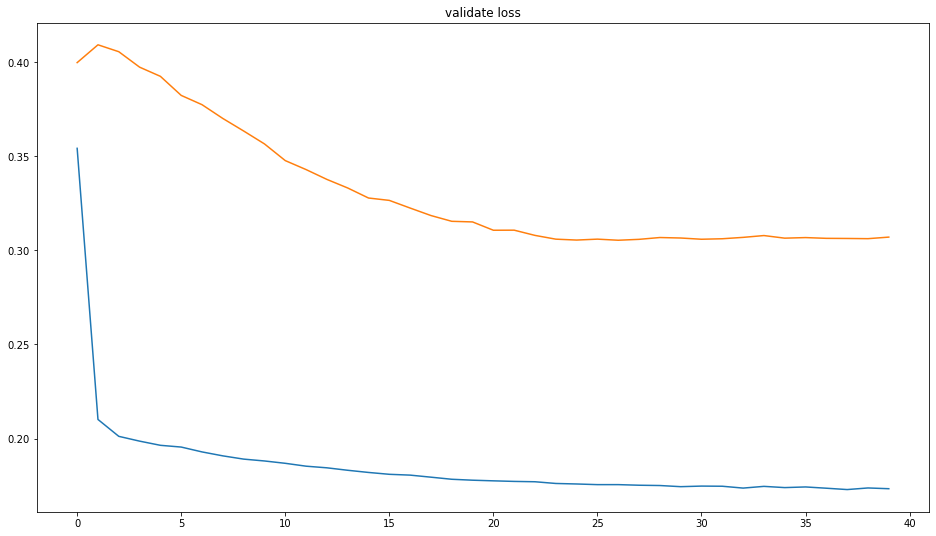

In [310]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.plot(history.history['val_loss'])
plt.title('validate loss')
plt.show()

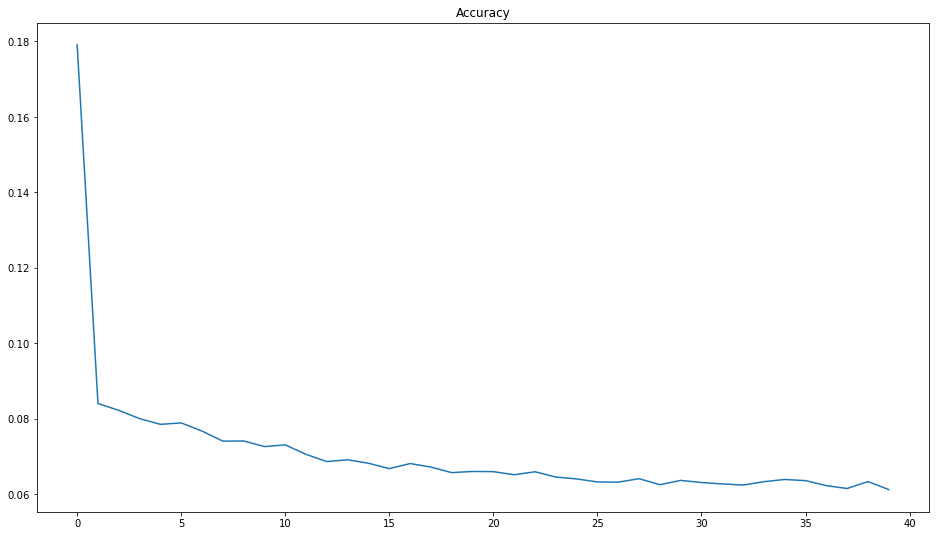

In [311]:
plt.title('Accuracy')
plt.plot(history.history['mse']) #'mean_squared_error'])
plt.show()
#history.history

In [312]:
compara = pd.DataFrame(np.array([y_val, [x[0] for x in results]])).transpose()
compara.columns = ['real', 'prediccion']

inverted = scaler.inverse_transform(compara.values)

compara2 = pd.DataFrame(inverted)
compara2.columns = ['real', 'prediccion']
compara2['diferencia'] = compara2['real'] - compara2['prediccion']
compara2.head()

,real,prediccion,diferencia
0,77.0,30.099201,46.900799
1,42.0,51.982323,-9.982323
2,43.0,38.491749,4.508251
3,41.0,39.489170,1.510830
4,107.0,65.228111,41.771889


In [313]:
compara2.describe()

,real,prediccion,diferencia
count,33.000000,33.000000,33.000000
mean,52.878788,47.425674,5.453113
std,29.517744,16.167498,32.316292
min,0.000000,19.032114,-51.365021
25%,39.000000,37.516972,-12.511951
50%,45.000000,44.456696,1.510830
75%,65.000000,51.982323,15.608513
max,125.999992,89.155136,106.967880


<AxesSubplot:>

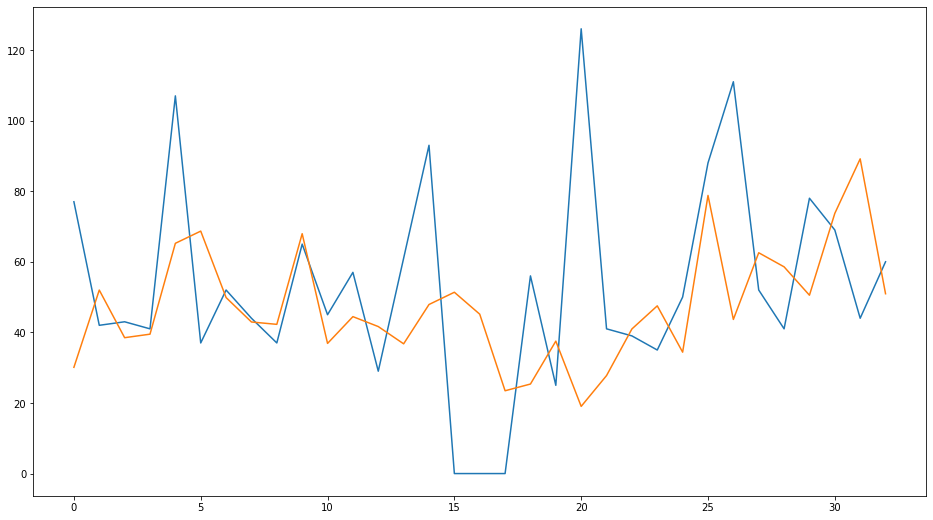

In [314]:
compara2['real'].plot()
compara2['prediccion'].plot()

# Predicción

A partir de la última semana de noviembre 2018, intentaremos predecir la primer semana de diciembre.

In [315]:
ultimosDias = df['2021-04-01':'2021-04-23']
ultimosDias

fecha
2021-04-05     56
2021-04-06     25
2021-04-07    126
2021-04-08     41
2021-04-09     39
2021-04-12     35
2021-04-13     50
2021-04-14     88
2021-04-15    111
2021-04-16     52
2021-04-19     41
2021-04-20     78
2021-04-21     69
2021-04-22     44
2021-04-23     60
Name: OPC3, dtype: int64

## Preparamos los datos para Test

In [321]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[5]], axis=1, inplace=True)
reframed.head(5)

,var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
5,-0.386139,-1.000000,1.000000,-0.683168,-0.722772
6,-1.000000,1.000000,-0.683168,-0.722772,-0.801980
7,1.000000,-0.683168,-0.722772,-0.801980,-0.504950
8,-0.683168,-0.722772,-0.801980,-0.504950,0.247525
9,-0.722772,-0.801980,-0.504950,0.247525,0.702970


In [322]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))


In [323]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test

## Pronóstico para la "próxima semana"

In [324]:
results=[]
diasaprocesar = 5 # No se carga toda la semana
for i in range(diasaprocesar):   
    parcial=model.predict(x_test)
    results.append(parcial[0])
    #print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])
    

## Re-Convertimos los resultados

In [325]:
adimen = [x for x in results]    
#print(adimen)
inverted = scaler.inverse_transform(adimen)
inverted

array([[51.73221566],
       [65.82350831],
       [79.95272515],
       [54.32798823],
       [52.11481815]])

## Visualizamos el pronóstico

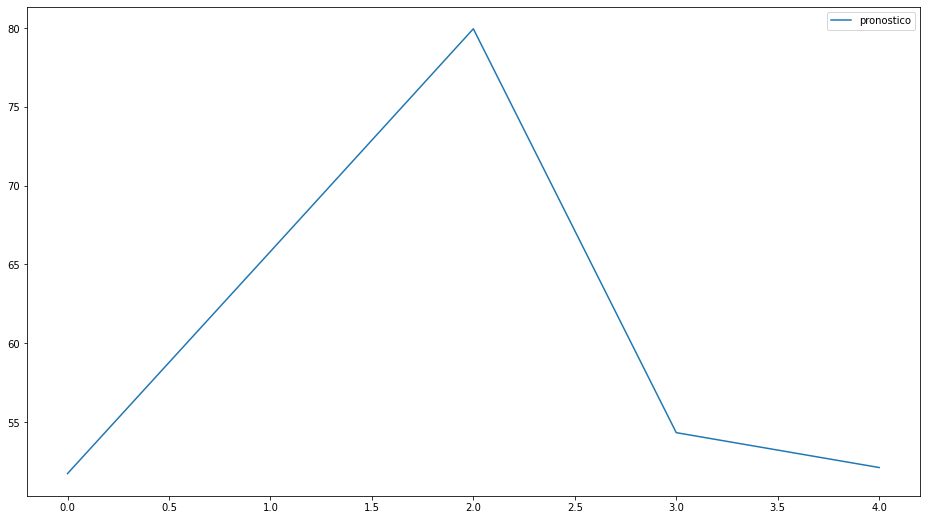

In [326]:
prediccion1ProximaSemana = pd.DataFrame(inverted)
prediccion1ProximaSemana.columns = ['pronostico']
prediccion1ProximaSemana.plot()
prediccion1ProximaSemana.to_csv('pronostico.csv')

In [327]:
prediccion1ProximaSemana

,pronostico
0,51.732216
1,65.823508
2,79.952725
3,54.327988
4,52.114818


# Agregamos el resultado en el dataset

In [328]:
i=23 # Se cambia al numero de día
for fila in prediccion1ProximaSemana.pronostico:
    i=i+1
    ultimosDias.loc['2020-04-' + str(i) + ' 00:00:00'] = fila
    print(fila)
ultimosDias.tail(14)

51.73221565731584
65.82350831385668
79.95272514894263
54.327988233022204
52.11481814640752


fecha
2021-04-13 00:00:00     50.000000
2021-04-14 00:00:00     88.000000
2021-04-15 00:00:00    111.000000
2021-04-16 00:00:00     52.000000
2021-04-19 00:00:00     41.000000
2021-04-20 00:00:00     78.000000
2021-04-21 00:00:00     69.000000
2021-04-22 00:00:00     44.000000
2021-04-23 00:00:00     60.000000
2020-04-24 00:00:00     51.732216
2020-04-25 00:00:00     65.823508
2020-04-26 00:00:00     79.952725
2020-04-27 00:00:00     54.327988
2020-04-28 00:00:00     52.114818
Name: OPC3, dtype: float64

El artículo completo en www.aprendemachinelearning.com